# Desafio - Análise de Negócios

Variação do Preço do Barril de Petróleo Brent

Objetivo: Criar um dashboard analisando a variação do preço do barril de petróleo Brent ao longo do tempo,
utilizando a tabela disponível no site Ipea Data. Além disso, você pode utilizar dados externos relevantes
para complementar a análise.



## Passo 1: Coletando os dados

Acesse o site mencionado e baixe a tabela que contém os dados históricos do preço do barril de petróleo Brent (FOB). Os dados estão na página do Ipea, salve em um csv em seu computador.

In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# tratamento de dados
import pandas as pd
import numpy as np

# tratamento de datas
import datetime

# dataviz
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import locale
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [10]:
dados = pd.read_csv(r'https://raw.githubusercontent.com/torvess/Tech_Challeng_FIAP_Fase_04/refs/heads/main/Dados/dados_petroleo.csv')

* Preço por barril do petróleo bruto tipo Brent. Produzido no Mar do Norte (Europa), Brent é uma classe de petróleo bruto que serve como benchmark para o preço internacional de diferentes tipos de petróleo. Neste caso, é valorado no chamado preço FOB (free on board), que não inclui despesa de frete e seguro no preço.

In [11]:
dados.head()

,data,preco
0,2024-10-15,73.68
1,2024-10-12,78.47
2,2024-10-11,80.27
3,2024-10-10,79.45
4,2024-10-09,77.06


In [12]:
# conhecendo os dados
print(f'Número de linhas: {dados.shape[0]:,}')
print(f'Número de colunas: {dados.shape[1]}')

print('                                          ')

print(f'Data mínima: {dados.data.min()}')
print(f'Data máxima: {dados.data.max()}')

Número de linhas: 11,278
Número de colunas: 2
                                          
Data mínima: 1987-05-20
Data máxima: 2024-10-15


In [13]:
# nenhum valor nulo
dados.isnull().sum().sum()

np.int64(0)

In [14]:
dados.duplicated().sum().sum()

np.int64(0)

In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11278 entries, 0 to 11277
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    11278 non-null  object 
 1   preco   11278 non-null  float64
dtypes: float64(1), object(1)
memory usage: 176.3+ KB


In [16]:
dados['data'] = pd.to_datetime(dados['data'], format='%Y-%m-%d')

## Passo 2: Limpeza e preparação dos dados
Utilize ferramentas de sua preferência (com Python) para abrir o arquivo CSV e fazer a limpeza e preparação dos dados. Verifique se há dados ausentes, remova linhas ou preencha-os conforme apropriado. Certifique se de que as colunas estão corretamente formatadas e converta-as, se necessário.

In [17]:

# criando um df para fazer alteraçoes
dados_petroleo = dados.copy()

In [18]:
dados_petroleo.head()

,data,preco
0,2024-10-15,73.68
1,2024-10-12,78.47
2,2024-10-11,80.27
3,2024-10-10,79.45
4,2024-10-09,77.06


In [19]:
dados_petroleo.head()

,data,preco
0,2024-10-15,73.68
1,2024-10-12,78.47
2,2024-10-11,80.27
3,2024-10-10,79.45
4,2024-10-09,77.06


In [20]:
dias_da_semana = {
    0: 'segunda-feira',
    1: 'terça-feira',
    2: 'quarta-feira',
    3: 'quinta-feira',
    4: 'sexta-feira',
    5: 'sábado',
    6: 'domingo'
}

# criando colunas necessarias para a analise
dados_petroleo = dados_petroleo.assign(
                                    semana_ano = dados_petroleo.data.dt.isocalendar().week,
                                    dia_semana = dados_petroleo.data.dt.isocalendar().day,
                                    nome_dia = dados_petroleo.data.dt.isocalendar().day.apply(lambda x: dias_da_semana.get(x)),
                                    ano = dados_petroleo.data.dt.isocalendar().year,
                                    mes = dados_petroleo.data.dt.month,
                                    nome_mes = dados_petroleo.data.dt.strftime('%B')
                                        )

# reordenando as colunas
dados_petroleo = dados_petroleo[['ano', 'mes', 'nome_mes', 'semana_ano', 'dia_semana', 'nome_dia', 'data', 'preco']]

## Passo 3: Análise exploratória

Explore os dados para obter insights preliminares sobre a variação do preço do barril de petróleo Brent. Calcule estatísticas descritivas básicas, como média, mediana, mínimo, máximo e desvio padrão do preço. Plote um gráficos para entender bem o dataset.

### **Análise exploratória**

In [21]:
dados_petroleo.head(2)

,ano,mes,nome_mes,semana_ano,dia_semana,nome_dia,data,preco
0,2024,10,outubro,42,2,quarta-feira,2024-10-15,73.68
1,2024,10,outubro,41,6,domingo,2024-10-12,78.47


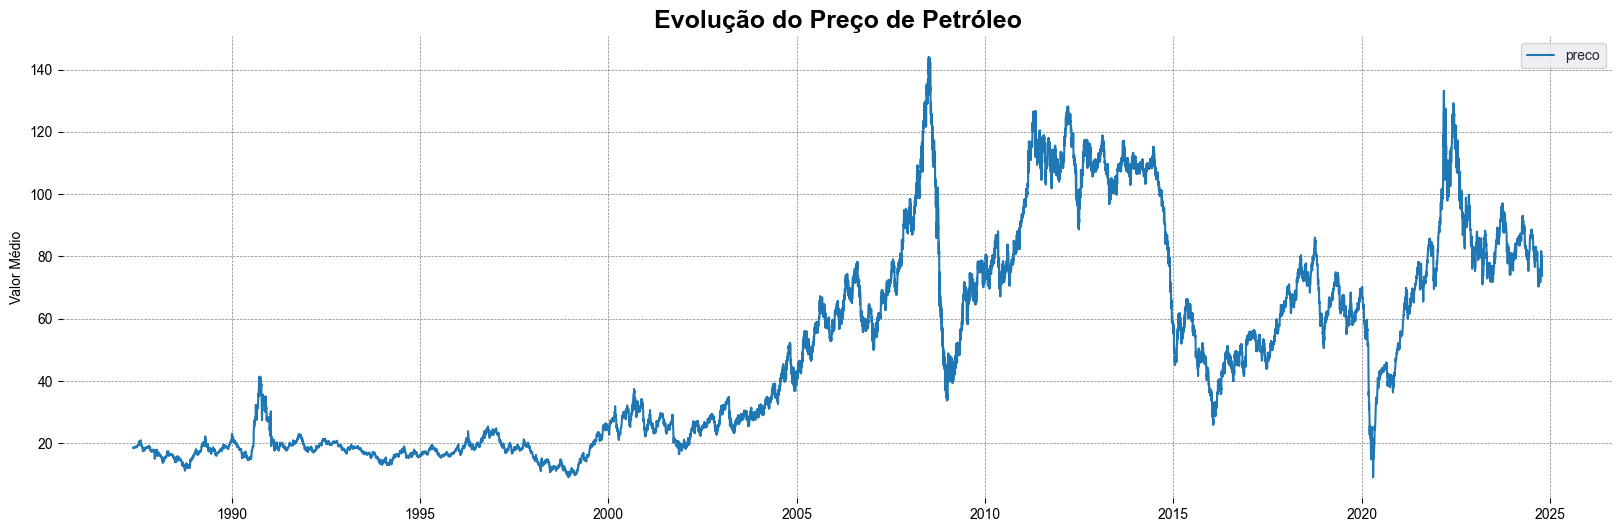

In [22]:
# tamanho da figura
fig, ax = plt.subplots(figsize=(20, 6))
# tema do fundo
sns.set_style("darkgrid")
# formatando os grids
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# removendo as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# plotando informaçoes do grafico
ax = sns.lineplot(data=dados_petroleo.groupby('data').agg({'preco':'mean'}))
ax.set_title('Evolução do Preço de Petróleo', fontsize=18, weight='bold')
ax.set_ylabel('Valor Médio')
ax.set_xlabel('')

plt.show()

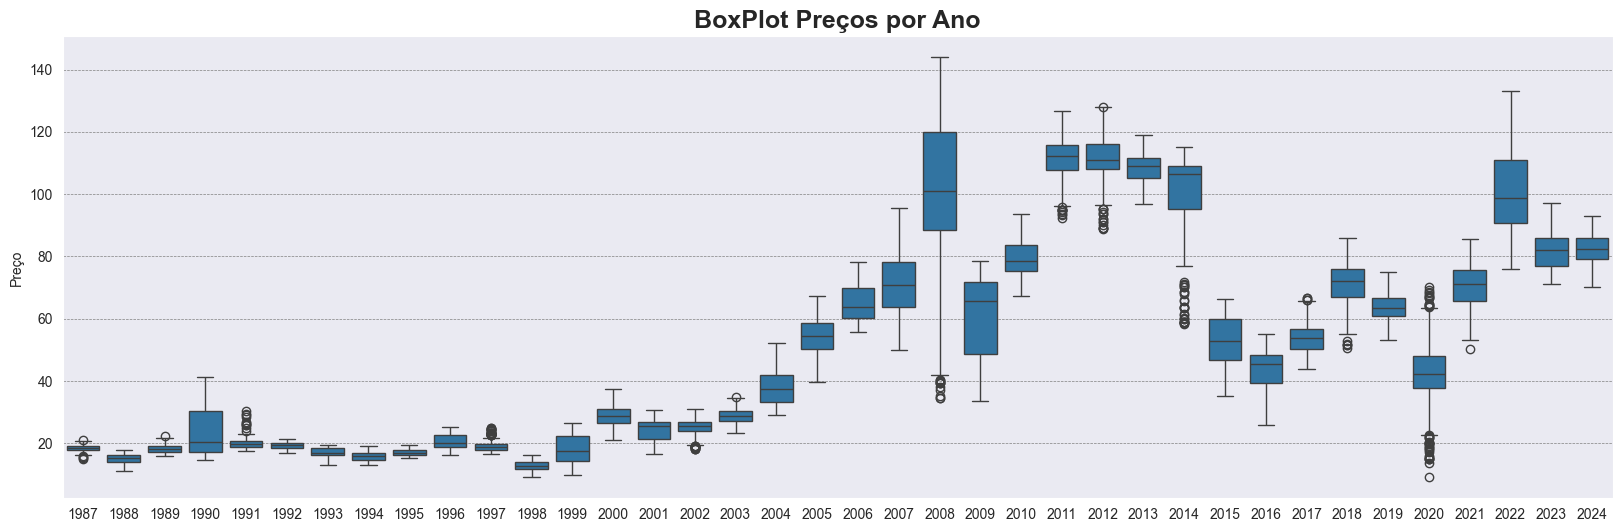

In [23]:
# tamanho da figura
fig, ax = plt.subplots(figsize=(20, 6))
# tema do fundo
sns.set_style("darkgrid")
# formatando os grids
plt.grid(color='gray', linestyle='--', linewidth=0.5)

ax = sns.boxplot(data=dados_petroleo, x='ano', y='preco')
ax.set_title('BoxPlot Preços por Ano', fontsize=18, weight='bold')
ax.set_ylabel('Preço')
ax.set_xlabel('')

plt.show()

In [24]:
dados_petroleo.describe().T

,count,mean,min,25%,50%,75%,max,std
ano,11278.0,2006.273364,1987.0,1998.0,2007.0,2015.0,2024.0,10.229035
mes,11278.0,6.531655,1.0,4.0,7.0,9.0,12.0,3.421787
semana_ano,11278.0,26.620057,1.0,14.0,27.0,39.0,53.0,14.92772
dia_semana,11278.0,3.531655,1.0,2.0,3.0,5.0,7.0,1.807834
data,11278,2006-10-09 15:57:06.352190208,1987-05-20 00:00:00,1998-06-26 18:00:00,2007-05-20 12:00:00,2015-03-12 18:00:00,2024-10-15 00:00:00,NaN
preco,11278.0,53.286608,9.1,20.6,48.83,76.8575,143.95,33.177414


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
dados_agrupados = dados_petroleo.groupby('ano', as_index=False)['preco'].sum()
dados_agrupados.rename(columns={'preco': 'soma_preco_petroleo'}, inplace=True)

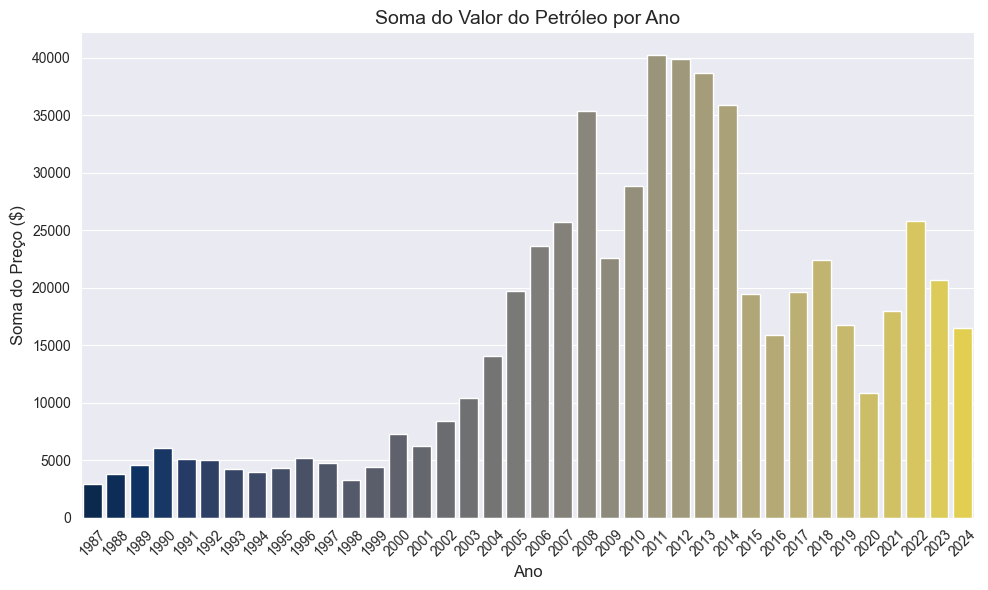

In [27]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='ano', y='soma_preco_petroleo', data=dados_agrupados, palette="cividis")

# Adiciona título e rótulos dos eixos
plt.title('Soma do Valor do Petróleo por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Soma do Preço ($)', fontsize=12)

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45)

plt.tight_layout()  #

* Entre 1988 e 2000, o preço anual manteve-se em até 10.000.
* Ano de 2000 ate 2023, ocorreu muitos altos e baixo.

* Houve um aumento drástico em 2008
* O preço caiu em 2009
* Nos anos de 2011, 2012, 2013 e 2014, ocorreu um aumento significativo no preço.

* Considerando os dados apresentados, a análise de um período tão extenso pode dificultar a identificação de tendências claras, especialmente porque as variações mais relevantes ocorreram após os anos 2000. Assim, faz mais sentido focar nesse intervalo mais recente, excluindo os dados anteriores a 2000 do nosso dataframe. Essa abordagem permitirá uma investigação mais precisa das oscilações de preço e facilitará a identificação de padrões significativos.

* **Filtrando os dados do Petróleo para o começo de 2000 à 2023:**

In [28]:
df_filtrado = dados_petroleo[(dados_petroleo['ano'] >= 2000) & (dados_petroleo['ano'] <= 2023)].reset_index(drop=True)

In [29]:
df_filtrado.head()

,ano,mes,nome_mes,semana_ano,dia_semana,nome_dia,data,preco
0,2023,12,dezembro,52,5,sábado,2023-12-29,77.69
1,2023,12,dezembro,52,4,sexta-feira,2023-12-28,79.04
2,2023,12,dezembro,52,3,quinta-feira,2023-12-27,80.97
3,2023,12,dezembro,52,2,quarta-feira,2023-12-26,80.23
4,2023,12,dezembro,51,5,sábado,2023-12-22,80.23


In [30]:
df_filtrado.describe()

,ano,mes,semana_ano,dia_semana,data,preco
count,7877.0,7877.000000,7877.0,7877.0,7877,7877.000000
mean,2011.1512,6.516440,26.557573,3.752444,2011-08-26 00:34:44.042148096,66.851254
min,2000.0,1.000000,1.0,1.0,2000-01-04 00:00:00,9.120000
25%,2006.0,4.000000,14.0,2.0,2006-02-04 00:00:00,43.960000
50%,2011.0,7.000000,27.0,4.0,2011-07-11 00:00:00,63.770000
75%,2016.0,9.000000,40.0,5.0,2016-12-21 00:00:00,88.110000
max,2023.0,12.000000,53.0,7.0,2023-12-29 00:00:00,143.950000
std,6.530984,3.433381,14.980159,1.915802,NaN,29.324092


### **Análise da média do preço do Petróleo por Ano:**

In [31]:
# Agrupa os dados por ano e calcula a soma dos valores do petróleo para cada ano
dados_agrupados_1 = df_filtrado.groupby('ano', as_index=False)['preco'].mean()
dados_agrupados_1.rename(columns={'preco': 'media_preco_petroleo'}, inplace=True)

In [32]:
dados_agrupados_1.head()

,ano,media_preco_petroleo
0,2000,28.660672
1,2001,24.475664
2,2002,25.187327
3,2003,28.861247
4,2004,38.102351


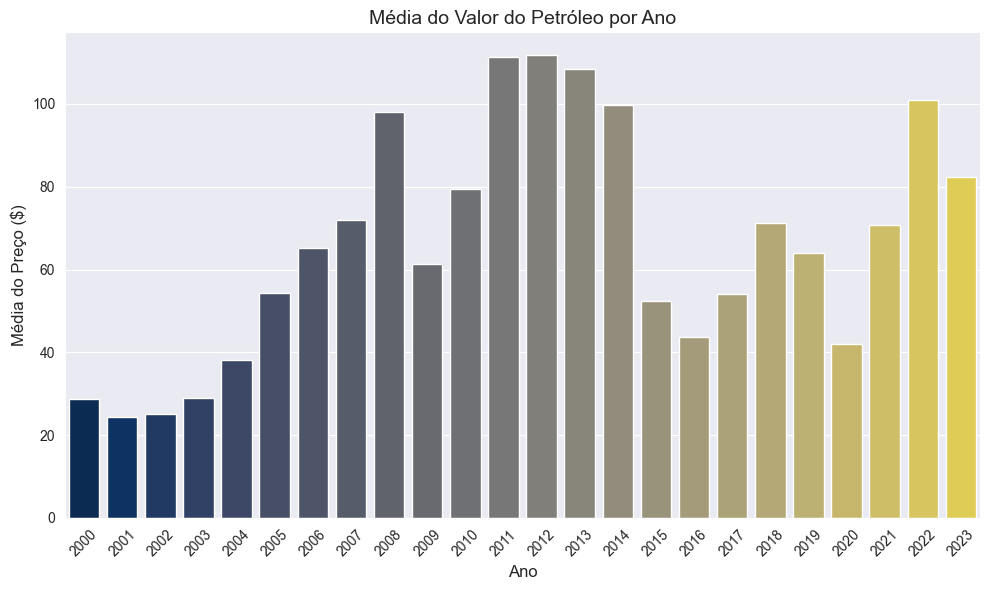

In [33]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='ano', y='media_preco_petroleo', data=dados_agrupados_1, palette="cividis")

# Adiciona título e rótulos dos eixos
plt.title('Média do Valor do Petróleo por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Média do Preço ($)', fontsize=12)

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45)

plt.tight_layout()  # Ajusta o layout
plt.show()

Dessa forma, podemos realizar uma análise mais direta e focada nos valores, o que nos permitirá fazer previsões mais precisas e realistas com base nos dados disponíveis. No entanto, é fundamental prestar atenção em eventos específicos que impactaram significativamente os preços, como os anos de 2008, 2011, 2012 e 2013. Durante esses anos, observamos um crescimento acentuado que se destaca em comparação com outros períodos, o que sugere a presença de fatores externos ou mudanças no mercado que precisam ser compreendidos.

Durante a pandemia de COVID-19, a demanda global por petróleo diminuiu drasticamente, especialmente com as restrições de mobilidade, a redução na produção industrial e o menor consumo de combustível. Essa queda na demanda levou os preços a níveis historicamente baixos em alguns períodos de 2020.

Ao calcular a média anual para cada ano, o valor médio para 2020 pode, de fato, ficar menor devido à baixa demanda e à consequente redução nos preços. Esse efeito é ampliado pois estamos considerando médias anuais, já que os momentos de baixa podem "puxar" a média para baixo.

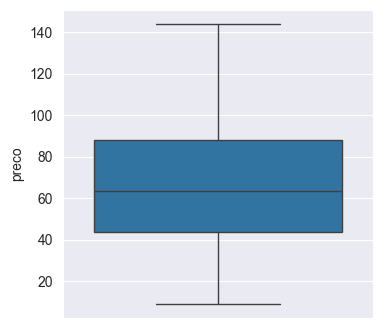

In [34]:
ax = sns.boxplot(y=df_filtrado['preco'], data=df_filtrado)
ax.figure.set_size_inches(4,4)

### **Análise da média do preço do Petróleo por mes:**

In [35]:
dados_agrupados_2 = df_filtrado.groupby(['ano', 'mes'], as_index=False)['preco'].mean()
dados_agrupados_2.rename(columns={'preco': 'media_preco_petroleo_mensal'}, inplace=True)

In [36]:
dados_agrupados_2['ano_mes'] = dados_agrupados_2['ano'].astype(str) + '-' + dados_agrupados_2['mes'].astype(str)

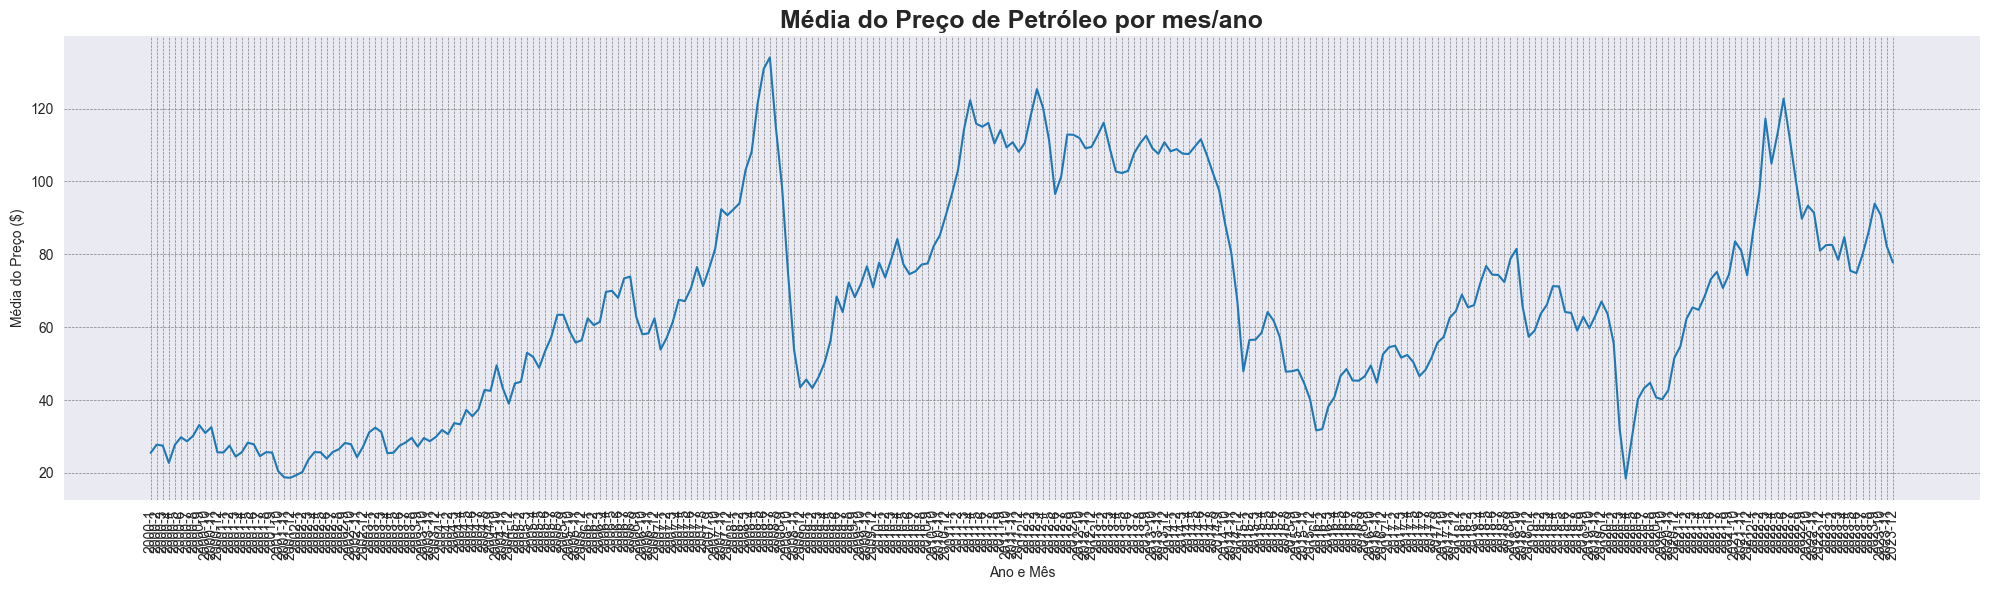

In [37]:
# tamanho da figura
fig, ax = plt.subplots(figsize=(20, 6))
# tema do fundo
sns.set_style("darkgrid")
# formatando os grids
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# removendo as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# plotando informaçoes do grafico
ax = sns.lineplot(data=dados_agrupados_2, x=dados_agrupados_2['ano_mes'], y=dados_agrupados_2['media_preco_petroleo_mensal'])
ax.set_title('Média do Preço de Petróleo por mes/ano', fontsize=18, weight='bold')
ax.set_ylabel('Média do Preço ($)')
ax.set_xlabel('Ano e Mês')

plt.xticks(rotation=90)

plt.tight_layout()  # Ajusta o layout

plt.show()



* Impossivel a visualização. Nas próximas análises, iremos focar nos anos que ocorreram algum fenomeno diferente do normal.

## Criação do modelo de Machine Learning 

Criar um modelo de Machine Learning que faça a previsão do preço do petróleo diariamente (lembre-se de time series). Esse modelo deve estar contemplado em seu storytelling e deve conter o código que você trabalhou, analisando as performances do modelo. 

## Deploy

Criar um plano para fazer o deploy em produção do modelo, com as ferramentas que são necessárias.

## Passo 4: Complementando a análise com dados externos

Para enriquecer sua análise, busque dados externos relevantes que possam influenciar o preço do petróleo Brent. Por exemplo, você pode procurar dados sobre produção global de petróleo, eventos geopolíticos, crises econômicas, demanda global por energia, entre outros. Integre esses dados à sua análise e avalie como eles se relacionam com a variação do preço do barril de petróleo Brent ao longo do tempo.

### Análise dos ao preços nos anos 2019, 2020 e 2021, devido COVID19:

* **2019:**

In [38]:
# Filtra apenas os dados do ano de 2019
dados_2019 = df_filtrado[df_filtrado['ano'] == 2019]

# Agrupa por mês dentro do ano de 2020 e calcula a média mensal do preço do petróleo
dados_agrupados_2019 = dados_2019.groupby('mes', as_index=False)['preco'].mean()
dados_agrupados_2019.rename(columns={'preco': 'media_preco_petroleo_mensal_2019'}, inplace=True)

In [39]:
dados_agrupados_2019.describe()

,mes,media_preco_petroleo_mensal_2019
count,12.000000,12.000000
mean,6.500000,64.273248
std,3.605551,4.113818
min,1.000000,59.041818
25%,3.750000,62.048261
50%,6.500000,63.812391
75%,9.250000,66.360873
max,12.000000,71.259500


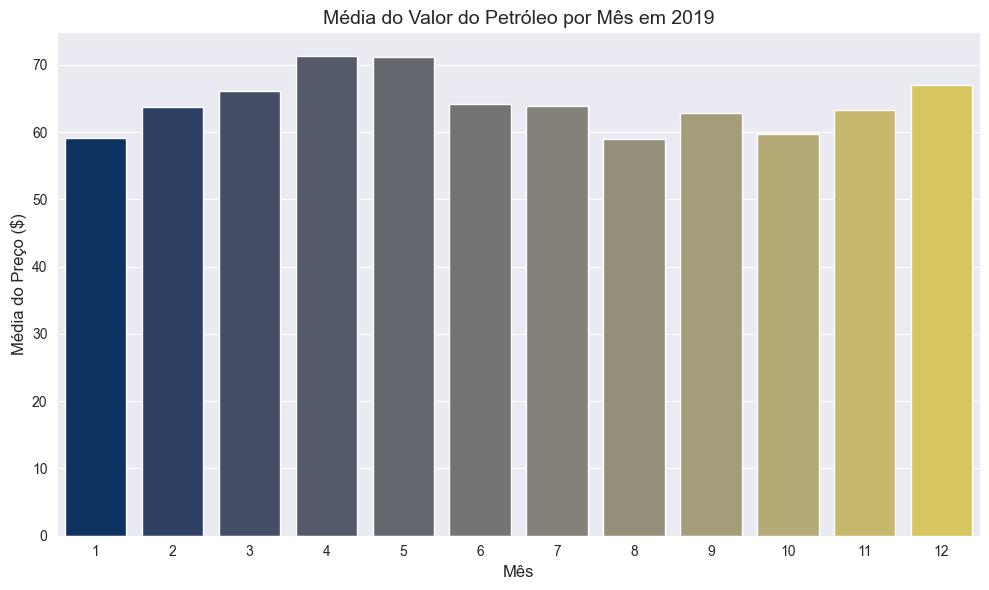

In [40]:
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='mes', y='media_preco_petroleo_mensal_2019', data=dados_agrupados_2019, palette="cividis")

# Adiciona título e rótulos dos eixos
plt.title('Média do Valor do Petróleo por Mês em 2019', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Média do Preço ($)', fontsize=12)

plt.tight_layout()  # Ajusta o layout
plt.show()

Em 2019, o preço médio do petróleo apresenta uma certa estabilidade ao longo do ano. Há uma leve variação, com valores mais altos no primeiro semestre (especialmente entre janeiro e maio) e uma queda gradual no segundo semestre. No entanto, as flutuações mensais não são tão acentuadas, e os preços permanecem em torno de $50 durante a maior parte do ano.

* **2020:**

In [41]:
# Filtra apenas os dados do ano de 2020
dados_2020 = df_filtrado[df_filtrado['ano'] == 2020]

# Agrupa por mês dentro do ano de 2020 e calcula a média mensal do preço do petróleo
dados_agrupados_2020 = dados_2020.groupby('mes', as_index=False)['preco'].mean()
dados_agrupados_2020.rename(columns={'preco': 'media_preco_petroleo_mensal'}, inplace=True)

In [42]:
dados_agrupados_2020.describe()

,mes,media_preco_petroleo_mensal
count,12.000000,12.000000
mean,6.500000,41.905688
std,3.605551,11.956933
min,1.000000,18.466667
25%,3.750000,38.144659
50%,6.500000,41.715990
75%,9.250000,46.446405
max,12.000000,63.645455


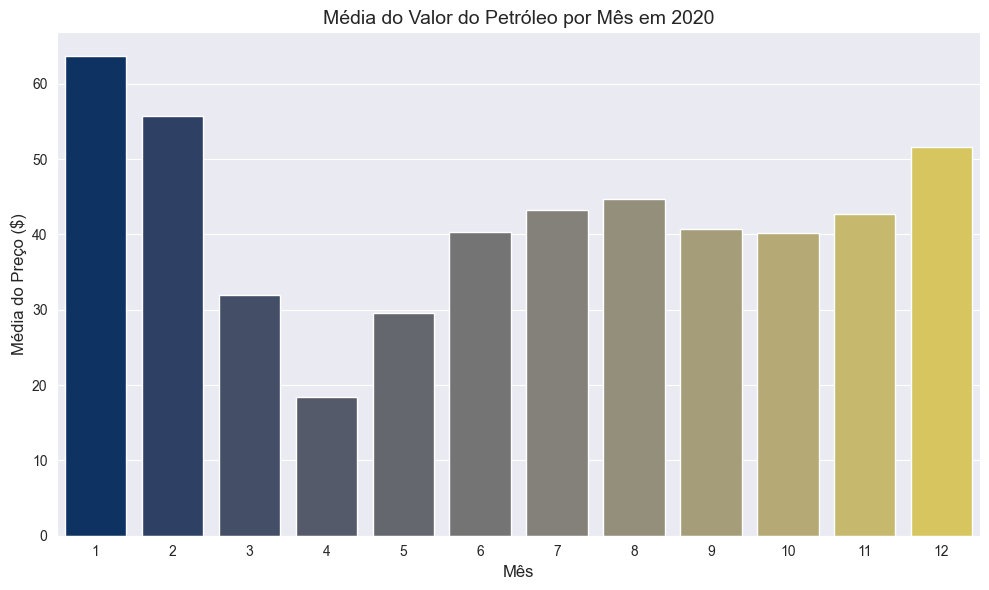

In [43]:
# Cria o gráfico de barras para os dados de 2020
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='mes', y='media_preco_petroleo_mensal', data=dados_agrupados_2020, palette="cividis")

# Adiciona título e rótulos dos eixos
plt.title('Média do Valor do Petróleo por Mês em 2020', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Média do Preço ($)', fontsize=12)

plt.tight_layout()  # Ajusta o layout
plt.show()

No início de 2020, os preços do petróleo começam em níveis semelhantes aos de 2019, com janeiro e fevereiro ainda mantendo valores altos. Entretanto, a partir de março, nota-se uma queda brusca. Em abril, os preços caem para um nível extremamente baixo, refletindo o impacto das restrições globais devido à pandemia de COVID-19, que reduziu drasticamente a demanda por petróleo. Esse período também coincide com um conflito de preços entre grandes produtores, o que contribuiu para a queda significativa nos valores.

Após o impacto inicial, os preços começam a se recuperar a partir de maio, embora lentamente. A recuperação continua no segundo semestre, mas os valores ainda permanecem abaixo dos níveis de janeiro e fevereiro de 2020 e das médias de 2019. Esse padrão reflete uma recuperação parcial da demanda global por petróleo, mas com ainda alguma incerteza e uma demanda ainda reduzida comparada aos níveis anteriores à pandemia.

* **2021:**

In [44]:
# Filtra apenas os dados do ano de 2020
dados_2021 = df_filtrado[df_filtrado['ano'] == 2020]

# Agrupa por mês dentro do ano de 2020 e calcula a média mensal do preço do petróleo
dados_agrupados_2021 = dados_2021.groupby('mes', as_index=False)['preco'].mean()
dados_agrupados_2021.rename(columns={'preco': 'media_preco_petroleo_mensal_2021'}, inplace=True)

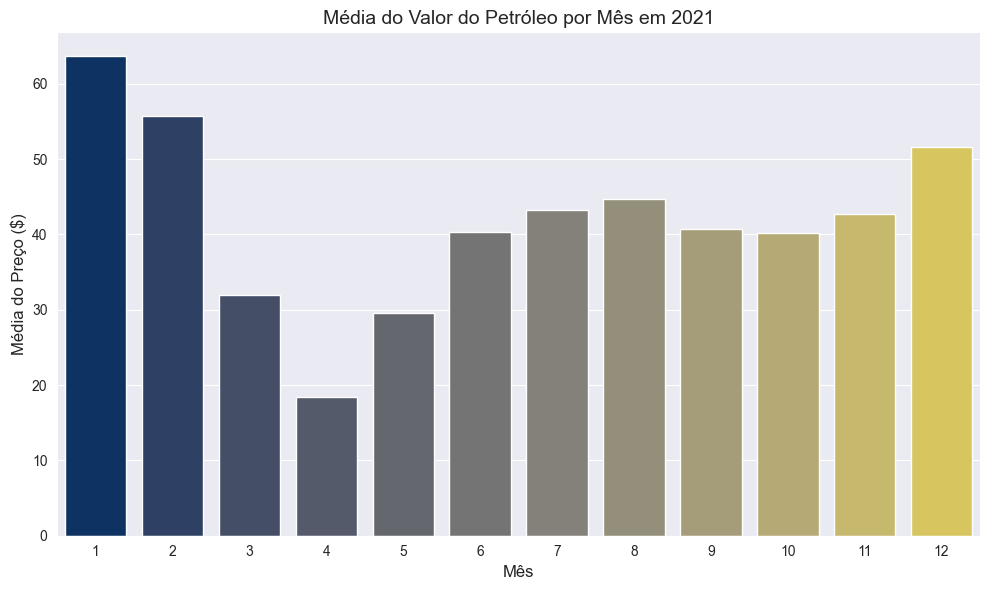

In [45]:
# Cria o gráfico de barras para os dados de 2020
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='mes', y='media_preco_petroleo_mensal_2021', data=dados_agrupados_2021, palette="cividis")

# Adiciona título e rótulos dos eixos
plt.title('Média do Valor do Petróleo por Mês em 2021', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Média do Preço ($)', fontsize=12)

plt.tight_layout()  # Ajusta o layout
plt.show()

O preço médio do petróleo começa o ano em um nível alto em janeiro, cerca de $45, e sofre uma leve queda nos meses seguintes, atingindo seu ponto mais baixo em abril.

A partir de maio, há uma recuperação significativa e constante. Os preços começam a subir e permanecem mais estáveis entre agosto e dezembro, com um leve aumento. Em dezembro, os preços se estabilizam em torno de $30, mostrando uma recuperação em relação aos baixos níveis observados no início de 2020.

Essa recuperação em 2021 pode ser explicada por uma demanda global mais sólida, impulsionada pela reabertura de economias e pelo avanço da vacinação contra a COVID-19, que contribuiu para a retomada das atividades econômicas. 

Esse padrão reflete a resiliência do mercado de petróleo, que responde tanto à demanda global quanto aos ajustes de produção dos grandes países produtores. A recuperação de 2021 indica uma demanda mais robusta, mas a continuidade desse aumento dependeria de fatores econômicos globais e da gestão da oferta no mercado de petróleo.

### Média da Produção de petróleo por Ano:

In [46]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
producao = pd.read_excel("C:\\Users\\tamir\\OneDrive\\Área de Trabalho\\producao.xlsx")

In [48]:
producao.head()

,year,barrels per year,country
0,2000,5.7,Albania
1,2001,5.6,Albania
2,2002,7.1,Albania
3,2003,6.8,Albania
4,2004,7.6,Albania


In [49]:
producao.shape


(2571, 3)

In [50]:
producao.columns

Index(['year', 'barrels per year', 'country'], dtype='object')

In [51]:
print(producao['barrels per year'].unique())

['5.7' '5.6' '7.1' ... 300 286 281]


In [52]:
import numpy as np

# Substituir '--' por NaN
producao['barrels per year'] = producao['barrels per year'].replace('--', 0)

In [53]:
producao['year'] = pd.to_datetime(producao['year'], format='%Y').dt.year
producao['barrels per year'] = producao['barrels per year'].astype(float)

In [54]:
producao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              2571 non-null   int32  
 1   barrels per year  2571 non-null   float64
 2   country           2571 non-null   object 
dtypes: float64(1), int32(1), object(1)
memory usage: 50.3+ KB


In [55]:
producao['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023], dtype=int32)

In [56]:
producao['country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Cameroon', 'Canada', 'Chad', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'East Timor',
       'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia', 'Finland',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Libya', 'Lithuania',
       'Malaysia', 'Mongolia', 'Myanmar', 'Netherlands', 'New Zealand',
       'Niger', 'Nigeria', 'North Korea', 'Norway', 'Oman', 'Pakistan',
       'Papua New Guinea', 'Paragua

In [57]:
# Verificando se há valores duplicados:
producao.value_counts()

# Temos valores repetidos, porem ja era esperado.

year  barrels per year  country       
2023  21973.0           United States     1
2000  0.2               Mongolia          1
      0.4               Tajikistan        1
      0.5               Bulgaria          1
      0.9               Philippines       1
                                         ..
      7.0               Ivory Coast       1
      7.5               Czech Republic    1
      9.0               Chile             1
      10.0              Suriname          1
      12.0              Myanmar           1
Name: count, Length: 2571, dtype: int64

In [58]:
producao_media_por_ano = producao.groupby('year')['barrels per year'].mean().reset_index()
producao_media_por_ano.head()

,year,barrels per year
0,2000,847.622353
1,2001,847.989412
2,2002,845.781176
3,2003,867.289535
4,2004,733.121296


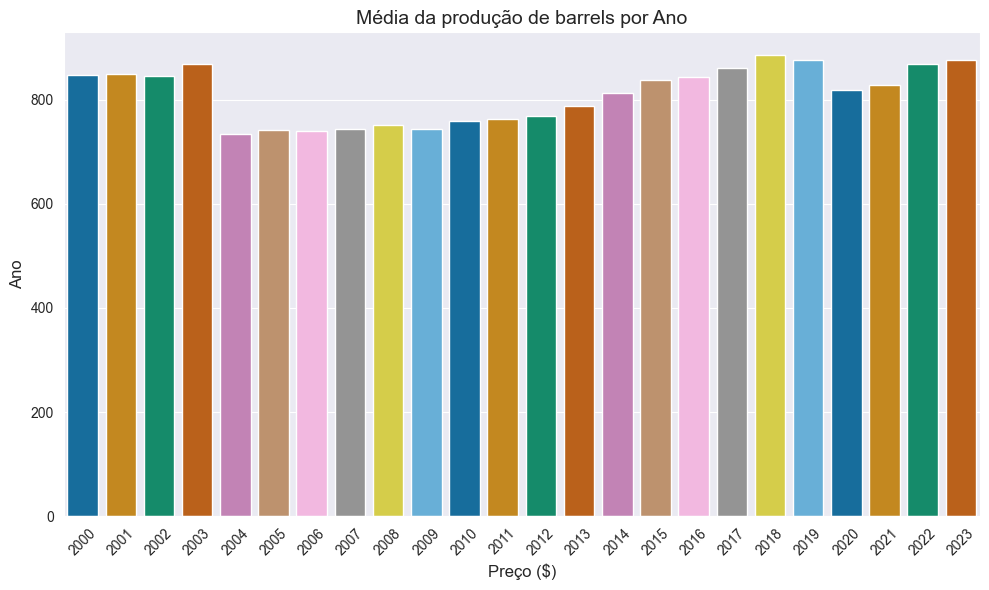

In [59]:
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='year', y='barrels per year', data=producao_media_por_ano, palette="colorblind")

# Adiciona título e rótulos dos eixos
plt.title('Média da produção de barrels por Ano', fontsize=14)
plt.xlabel('Preço ($)', fontsize=12)
plt.ylabel('Ano', fontsize=12)

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45
           )  # Define rotação de 0 graus

plt.tight_layout()  # Ajusta o layout
plt.show()

### Juntando os dados dos preços com a produção:

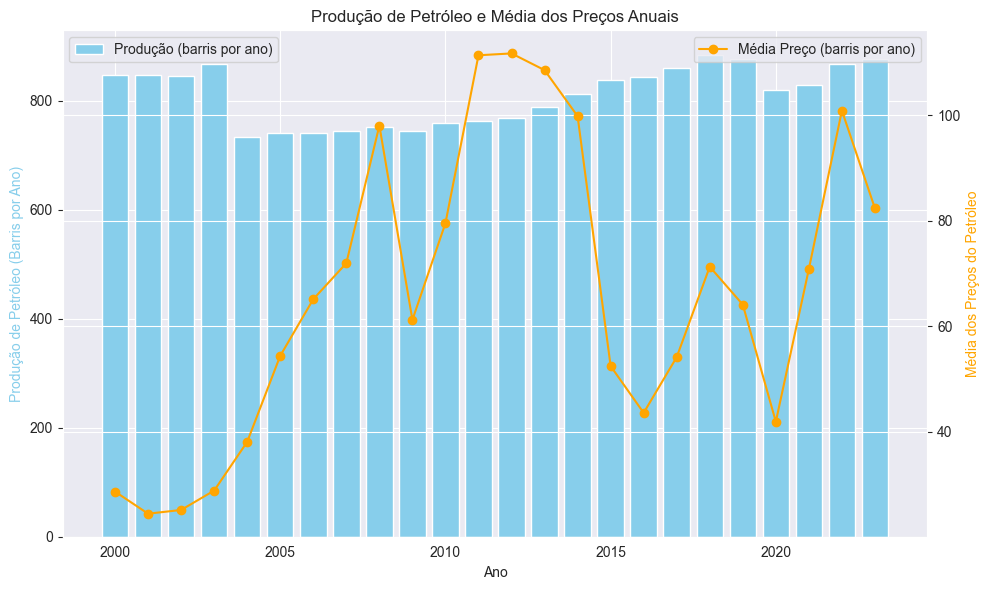

In [60]:
# Mesclando os dois DataFrames com base no ano
dados = pd.merge(producao_media_por_ano, dados_agrupados_1, left_on='year', right_on='ano', how='inner')

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a produção de petróleo
ax1.bar(dados['year'], dados['barrels per year'], color='skyblue', label='Produção (barris por ano)')
ax1.set_ylabel('Produção de Petróleo (Barris por Ano)', color='skyblue')
ax1.set_xlabel('Ano')

# Eixo secundário para a linha do preço do petróleo
ax2 = ax1.twinx()
ax2.plot(dados['year'], dados['media_preco_petroleo'], color='orange', marker='o', label='Média Preço (barris por ano)')
ax2.set_ylabel('Média dos Preços do Petróleo', color='orange')

# Título e exibição da legenda
plt.title('Produção de Petróleo e Média dos Preços Anuais')
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

Crescimento da Produção de Petróleo: A produção de petróleo aumentou de forma significativa desde o início dos anos 2000, estabilizando-se em torno de 2010. Esse crescimento reflete avanços na capacidade de produção, possivelmente devido a novas descobertas, avanços tecnológicos, ou investimentos na infraestrutura de extração de petróleo.

Volatilidade dos Preços do Petróleo: A linha laranja que representa a média dos preços anuais do petróleo mostra uma grande volatilidade. Os preços subiram acentuadamente até cerca de 2008, atingindo um pico, seguido por uma queda acentuada. Depois de 2010, os preços continuaram a flutuar, com uma queda significativa por volta de 2015 e outra em torno de 2020, talvez relacionada a crises econômicas ou eventos globais (como a pandemia de COVID-19 em 2020).

### Análise Crescimento Percentual de Produção de Barris por Ano:

In [61]:
producao_soma_por_ano = producao.groupby('year')['barrels per year'].sum().reset_index()
producao_soma_por_ano.head()

,year,barrels per year
0,2000,72047.9
1,2001,72079.1
2,2002,71891.4
3,2003,74586.9
4,2004,79177.1


In [62]:
producao_soma_por_ano['percent_growth'] = producao_soma_por_ano['barrels per year'].pct_change() * 100
producao_soma_por_ano.head()

,year,barrels per year,percent_growth
0,2000,72047.9,NaN
1,2001,72079.1,0.043305
2,2002,71891.4,-0.260408
3,2003,74586.9,3.749405
4,2004,79177.1,6.154164


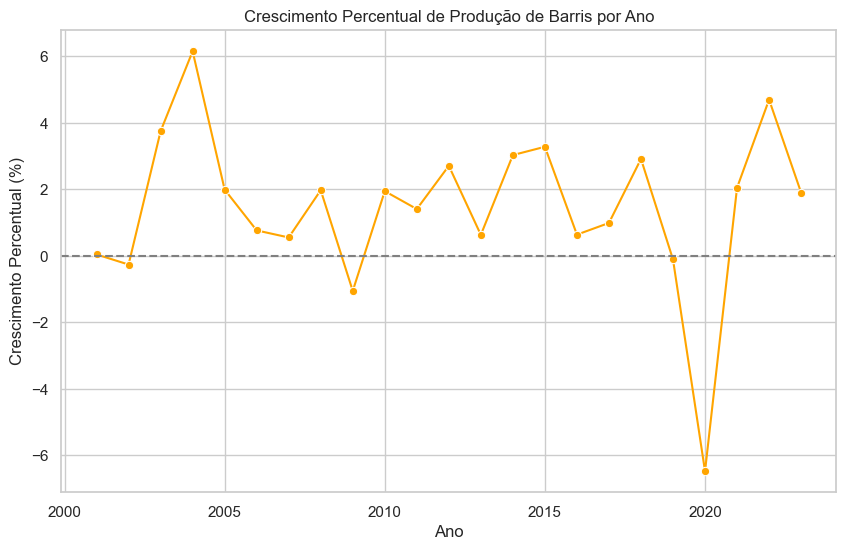

In [63]:
sns.set(style="whitegrid")

# Cria um gráfico de linha para a porcentagem de crescimento
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='percent_growth', data=producao_soma_por_ano, marker='o', color='orange')

# Configura os rótulos e título
plt.xlabel('Ano')
plt.ylabel('Crescimento Percentual (%)')
plt.title('Crescimento Percentual de Produção de Barris por Ano')

# Exibe o gráfico
plt.axhline(0, color='gray', linestyle='--')  # Linha horizontal no 0 para referência
plt.show()


O gráfico da produção anual de barris de petróleo ao longo dos anos de 2000 a 2023, acompanhada da taxa de crescimento percentual anual. A análise dos dados oferece insights importantes sobre as flutuações no setor de petróleo, bem como sobre o impacto de eventos globais específicos na produção.

Estabilidade Inicial (2000–2002): Entre 2000 e 2002, a produção de petróleo manteve-se estável, com oscilações muito pequenas, como o crescimento marginal de 0,04% em 2001 e uma leve queda de 0,26% em 2002.

Período de Crescimento Moderado (2003–2008): De 2003 a 2008, a produção apresentou um crescimento constante, especialmente notável em 2004 (6,15%), refletindo um aumento na demanda global impulsionado pelo crescimento econômico em várias regiões, especialmente na Ásia.

Crise Econômica Global (2009): Em 2009, observa-se uma queda de -1,05% na produção, refletindo o impacto da crise econômica global de 2008-2009, que reduziu a demanda e afetou a produção e os preços do petróleo.

Recuperação e Crescimento (2010–2019): Após a crise, a produção volta a crescer, apresentando valores consistentes de aumento na maioria dos anos, com destaques como 2015 (3,28%) e 2018 (2,92%). Esse período reflete o fortalecimento da economia global e a recuperação da demanda por petróleo.

Impacto da Pandemia (2020): Em 2020, há uma queda expressiva de -6,48% na produção, a maior de toda a série, devido à pandemia de COVID-19, que levou a uma redução drástica na demanda por petróleo e no consumo global de energia.

Recuperação Pós-Pandemia (2021–2023): A partir de 2021, a produção retoma um crescimento moderado. Em 2022, destaca-se uma recuperação significativa de 4,69%, com a demanda global voltando aos níveis pré-pandêmicos. Em 2023, o crescimento continua, embora em um ritmo mais moderado (1,9%).

In [64]:
# Salvando em CSV:
producao_soma_por_ano.to_csv('valor_acumulado.csv', index=False)


### Análise da produção de cada país do petróleo:

In [65]:
producao_media_por_pais = producao.groupby('country')['barrels per year'].mean().reset_index()
producao_media_por_pais.head(20)

,country,barrels per year
0,Albania,12.845833
1,Algeria,1707.625000
2,Angola,1450.250000
3,Argentina,777.541667
4,Armenia,0.000000
5,Aruba,2.177778
6,Australia,518.500000
7,Austria,26.958333
8,Azerbaijan,701.166667
9,Bahrain,200.791667


In [66]:
valores_zerados = (producao_media_por_pais['barrels per year'] == 0).sum()
print(f"Número de valores zerados: {valores_zerados}")


Número de valores zerados: 2


In [67]:
producao_soma_por_pais = producao_media_por_pais[producao_media_por_pais['barrels per year'] != 0]

In [68]:
media_produção_top_10_paises = producao_media_por_pais.nlargest(10, 'barrels per year')
media_produção_top_10_paises.head(10)

,country,barrels per year
108,United States,12829.750000
85,Saudi Arabia,10813.791667
84,Russia,10044.875000
25,China,4386.625000
22,Canada,4065.083333
50,Iran,3918.333333
106,United Arab Emirates,3321.750000
51,Iraq,3147.166667
18,Brazil,2658.791667
59,Kuwait,2629.500000


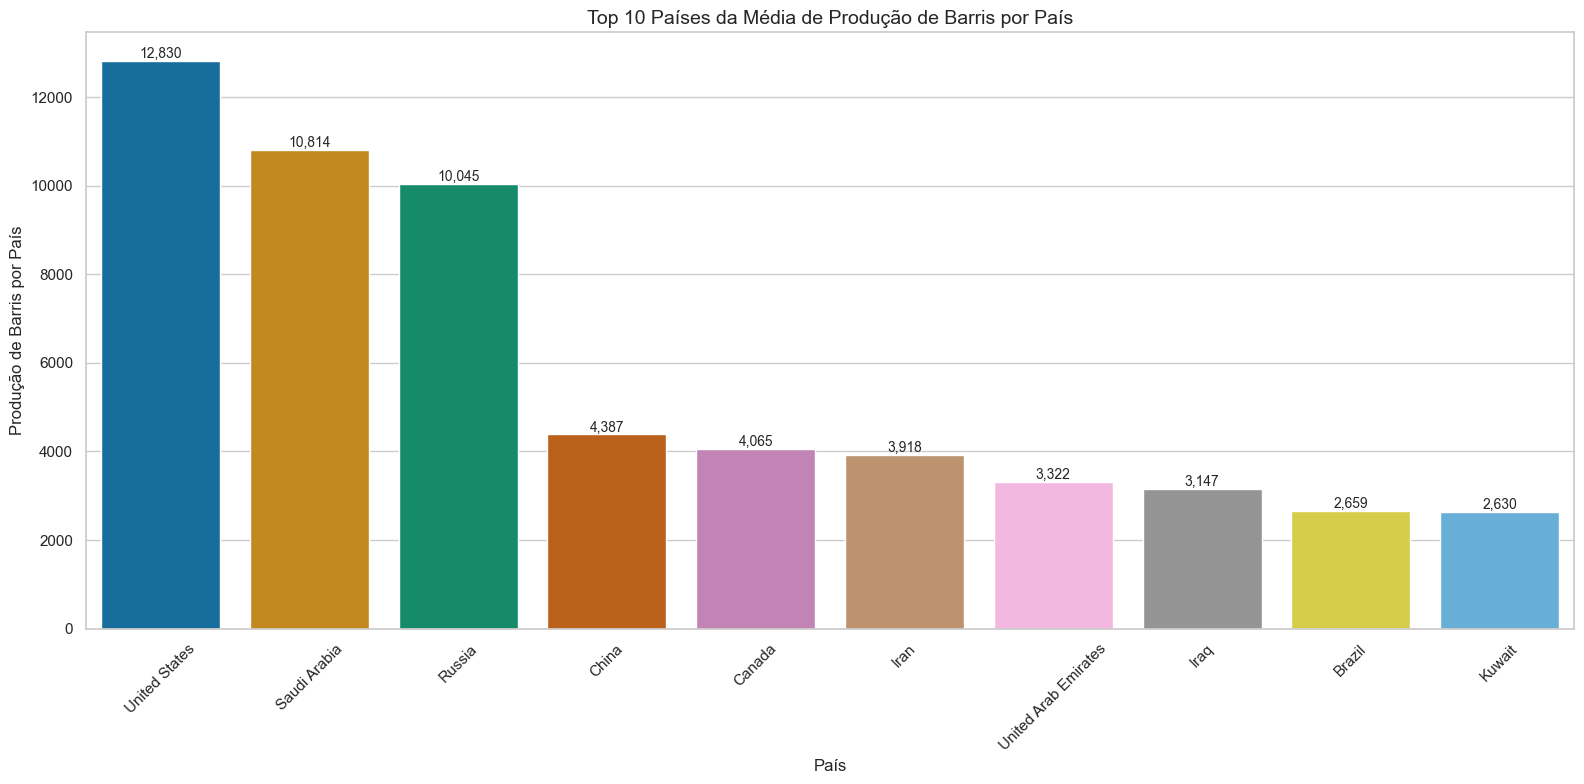

In [69]:
plt.figure(figsize=(16, 8))  # Ajusta o tamanho da figura
ax = sns.barplot(x='country', y='barrels per year', data=media_produção_top_10_paises, palette="colorblind")

# Adiciona título e rótulos dos eixos
plt.title('Top 10 Países da Média de Produção de Barris por País', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Produção de Barris por País', fontsize=12)

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45)

# Adiciona anotações dos valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formata o valor com vírgulas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição da anotação
                ha='center', va='bottom', fontsize=10)  # Alinhamento e tamanho da fonte

plt.tight_layout()  # Ajusta o layout
plt.show()


Os dados apresentados mostram a produção de petróleo em barris por ano para os principais países produtores, destacando o domínio de algumas nações no setor.

Estados Unidos lidera a produção global com 307.914 milhões de barris anuais, refletindo sua posição consolidada como principal produtor mundial. A capacidade de extração dos EUA se apoia em avanços tecnológicos, como o fraturamento hidráulico (fracking), que aumentou significativamente a produção nas últimas décadas.

Arábia Saudita ocupa o segundo lugar, com 259.531 milhões de barris, impulsionada por suas vastas reservas no Oriente Médio e pelo papel central que desempenha na Organização dos Países Exportadores de Petróleo (OPEP).

Rússia, em terceiro, com 241.077 milhões de barris, também desempenha um papel fundamental no mercado global de petróleo, fornecendo uma quantidade significativa para a Europa e a Ásia.

China e Canadá produzem 105.279 milhões e 97.562 milhões de barris, respectivamente. A China, embora seja um grande consumidor de petróleo, possui também uma produção significativa. O Canadá, por sua vez, conta com reservas consideráveis de petróleo, especialmente nas areias betuminosas de Alberta.

Outros países notáveis incluem o Irã (94.040 milhões), que enfrenta desafios devido a sanções econômicas, e os Emirados Árabes Unidos (79.722 milhões), que são conhecidos por suas reservas abundantes e política energética de expansão.

Iraque (75.532 milhões), Brasil (63.811 milhões), e Kuwait (63.108 milhões) completam a lista, cada um com um papel relevante na produção global. O Brasil, o único país da América Latina na lista, destaca-se pela exploração de petróleo em águas profundas, como na região do pré-sal.

Esses dados sublinham a importância estratégica do petróleo para cada uma dessas economias e evidenciam as diferenças na capacidade de produção entre os países, influenciando o mercado energético global.

### Análise da produção de petróleo, entre Ucrania e Russia:

In [70]:
# Filtra os dados para incluir apenas Ucrânia e Rússia
df_filtrado = producao[producao['country'].isin(['Ukraine'])]

# Agrupa os dados pelo país e ano, somando a produção de barris por ano
df_1 = df_filtrado.groupby(['country', 'year'])['barrels per year'].sum().reset_index()

# Exibe o DataFrame resultante
print(df_1)


    country  year  barrels per year
0   Ukraine  2000              82.0
1   Ukraine  2001              82.0
2   Ukraine  2002              83.0
3   Ukraine  2003              87.0
4   Ukraine  2004              95.0
5   Ukraine  2005              98.0
6   Ukraine  2006             106.0
7   Ukraine  2007             106.0
8   Ukraine  2008              99.0
9   Ukraine  2009              93.0
10  Ukraine  2010              82.0
11  Ukraine  2011              78.0
12  Ukraine  2012              80.0
13  Ukraine  2013              74.0
14  Ukraine  2014              65.0
15  Ukraine  2015              60.0
16  Ukraine  2016              57.0
17  Ukraine  2017              56.0
18  Ukraine  2018              58.0
19  Ukraine  2019              62.0
20  Ukraine  2020              61.0
21  Ukraine  2021              62.0
22  Ukraine  2022              18.0
23  Ukraine  2023               7.2


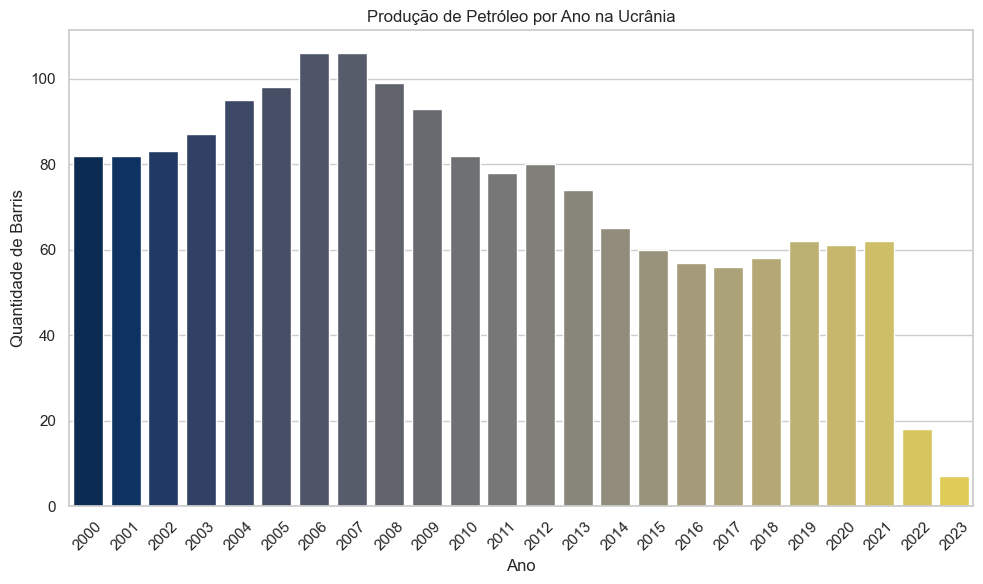

In [71]:

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='barrels per year', data=df_1, palette="cividis")

# Configura os rótulos e título
plt.xlabel('Ano')
plt.ylabel('Quantidade de Barris')
plt.title('Produção de Petróleo por Ano na Ucrânia')

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45)

# Adiciona anotações dos valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formata o valor com vírgulas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição da anotação
                ha='center', va='bottom', fontsize=10)  # Alinhamento e tamanho da fonte

plt.tight_layout()  # Ajusta o layout
plt.show()


Os conflitos entre a Ucrânia e a Rússia têm raízes históricas profundas, mas os eventos mais recentes que escalaram para um conflito armado começaram em 2014. Aqui estão os principais marcos:

* 2014: A crise começou em fevereiro de 2014, quando a Rússia anexou a Crimeia, uma península da Ucrânia. Isso ocorreu após a deposição do presidente ucraniano Viktor Yanukovych, que era pró-Rússia.

* Conflito no Leste da Ucrânia: Após a anexação da Crimeia, começaram os combates no leste da Ucrânia, onde grupos separatistas prorrussos declararam independência nas regiões de Donetsk e Luhansk. Este conflito resultou em uma guerra que continua até hoje.

* Escalada em 2021-2022: Em 2021, tensões aumentaram novamente com uma concentração significativa de tropas russas na fronteira com a Ucrânia. Em fevereiro de 2022, a Rússia lançou uma invasão em grande escala da Ucrânia, intensificando o conflito de forma dramática.


Ao analisar o gráfico, é evidente uma drástica queda na produção de petróleo na Ucrânia em 2022. Essa diminuição acentuada pode ser atribuída diretamente à guerra em curso, que começou em fevereiro daquele ano com a invasão russa.

A guerra impactou significativamente a infraestrutura do país, resultando em interrupções na produção e nas operações econômicas. As instalações de extração de petróleo, que são vitais para a economia ucraniana, enfrentaram desafios devido aos combates e à instabilidade na região. Além disso, a instabilidade política e as sanções internacionais contribuíram para a retração da produção.

Em resumo, a análise dos dados não apenas reflete a realidade econômica da Ucrânia durante um período de conflito, mas também destaca como situações geopolíticas podem ter consequências diretas na produção de recursos naturais e, por extensão, na economia de um país. Essa queda na produção é um indicador importante das dificuldades enfrentadas pela Ucrânia em tempos de guerra e ressalta a importância de monitorar eventos geopolíticos ao analisar dados econômicos.

In [72]:
# Filtra os dados para incluir apenas Ucrânia e Rússia
df_filtrado_1 = producao[producao['country'].isin(['Russia'])]

# Agrupa os dados pelo país e ano, somando a produção de barris por ano
df_2 = df_filtrado_1.groupby(['country', 'year'])['barrels per year'].sum().reset_index()

# Exibe o DataFrame resultante
print(df_2)

   country  year  barrels per year
0   Russia  2000            6527.0
1   Russia  2001            7061.0
2   Russia  2002            7741.0
3   Russia  2003            8581.0
4   Russia  2004            9387.0
5   Russia  2005            9647.0
6   Russia  2006            9734.0
7   Russia  2007           10038.0
8   Russia  2008            9874.0
9   Russia  2009           10047.0
10  Russia  2010           10288.0
11  Russia  2011           10409.0
12  Russia  2012           10596.0
13  Russia  2013           10766.0
14  Russia  2014           10853.0
15  Russia  2015           11035.0
16  Russia  2016           11245.0
17  Russia  2017           11231.0
18  Russia  2018           11385.0
19  Russia  2019           11474.0
20  Russia  2020           10496.0
21  Russia  2021           10777.0
22  Russia  2022           10978.0
23  Russia  2023           10907.0


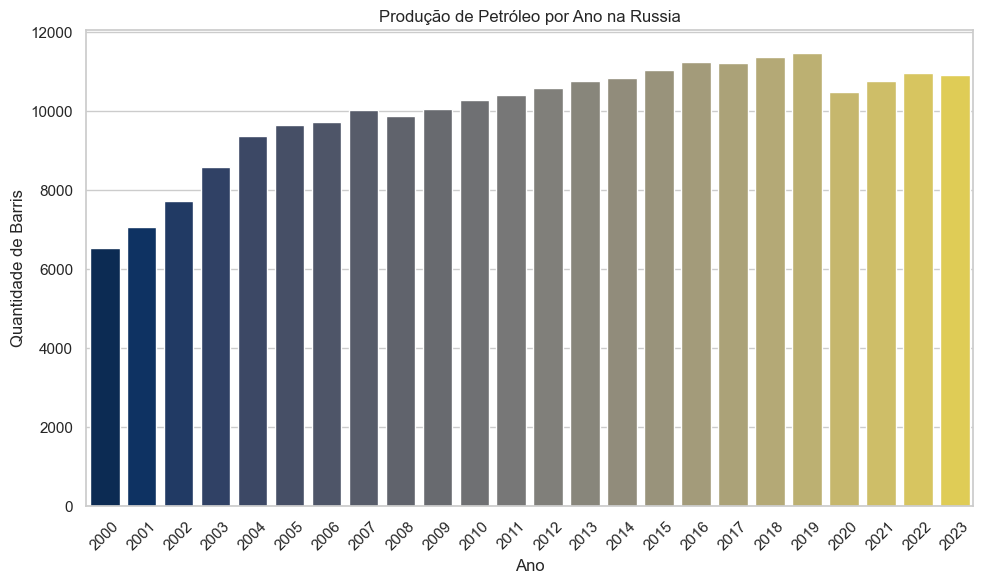

In [73]:

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='barrels per year', data=df_2, palette="cividis")


# Configura os rótulos e título
plt.xlabel('Ano')
plt.ylabel('Quantidade de Barris')
plt.title('Produção de Petróleo por Ano na Russia')

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45)

# Adiciona anotações dos valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formata o valor com vírgulas
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posição da anotação
                ha='center', va='bottom', fontsize=10)  # Alinhamento e tamanho da fonte

plt.tight_layout()  # Ajusta o layout
plt.show()

Ao analisar os dados da produção de petróleo da Rússia, é notável que, mesmo em meio a um contexto geopolítico desafiador, como as sanções internacionais e o impacto da guerra na Ucrânia, a produção de barris por ano parece ter se mantido relativamente estável.

Entre 2000 e 2023, a produção de petróleo na Rússia exibiu uma tendência geral de crescimento, com algumas oscilações. Em 2022, ano em que a guerra na Ucrânia intensificou-se, a produção foi de 10.978 milhões de barris, um leve aumento em relação a 2021, que registrou 10.777 milhões de barris. Mesmo em 2023, a produção permaneceu em um patamar semelhante, com 10.907 milhões de barris.

Esses dados sugerem que a Rússia conseguiu, até certo ponto, mitigar os efeitos adversos que a guerra e as sanções poderiam ter sobre sua produção. É importante ressaltar que a Rússia é um dos maiores produtores de petróleo do mundo e, portanto, sua infraestrutura e capacidade de extração são robustas. No entanto, o cenário global continua incerto, e a produção futura pode ser influenciada por fatores externos, como novas sanções ou alterações na demanda mundial.

Assim, ao interpretar esses números, é crucial considerar não apenas a produção em si, mas também o contexto mais amplo que envolve decisões políticas, sanções econômicas e a dinâmica do mercado global de energia.

### Análise do Consumo de energia:

In [74]:
consumo = pd.read_excel("C:\\Users\\tamir\\OneDrive\\Área de Trabalho\\Pos-Tech Fase 4\\Análise de negócios\\dados\\petroleo_consumo.xlsx")

In [75]:
consumo.head()
# QBTU (quilocalorias por tonelada de petróleo equivalente) 

,ano,QBTU,pais
0,2000,0.562,Colombia
1,2000,0.002,Saint Vincent/Grenadines
2,2000,0.132,U.S. Virgin Islands
3,2000,0.297,Uzbekistan
4,2000,0.001,British Virgin Islands


In [76]:
# Conversão de QBTU para Barris
consumo['barrels'] = consumo['QBTU'] / 0.0058

print(consumo)

       ano      QBTU                       pais        barrels
0     2000     0.562                   Colombia      96.896552
1     2000     0.002   Saint Vincent/Grenadines       0.344828
2     2000     0.132        U.S. Virgin Islands      22.758621
3     2000     0.297                 Uzbekistan      51.206897
4     2000     0.001     British Virgin Islands       0.172414
...    ...       ...                        ...            ...
4779  2022  1938.000       United Arab Emirates  334137.931034
4780  2022     0.051                    Albania       8.793103
4781  2022     0.247                     Angola      42.586207
4782  2022     0.055                Afghanistan       9.482759
4783  2022     0.017                      Aruba       2.931034

[4784 rows x 4 columns]


In [77]:
consumo.shape

(4784, 4)

In [78]:
consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784 entries, 0 to 4783
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ano      4784 non-null   int64  
 1   QBTU     4784 non-null   float64
 2   pais     4784 non-null   object 
 3   barrels  4784 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 149.6+ KB


In [79]:
consumo['pais'].unique()

array([' Colombia', ' Saint Vincent/Grenadines', ' U.S. Virgin Islands',
       ' Uzbekistan', ' British Virgin Islands', ' U.S. Pacific Islands',
       ' Venezuela', ' United States', ' Uruguay', ' Kosovo', ' Ukraine',
       ' South Sudan', ' Uganda', ' Zimbabwe', ' Tanzania', ' Zambia',
       ' Taiwan', ' South Africa', ' Turkiye', ' Yemen', ' Tunisia',
       ' Samoa', ' Trinidad and Tobago', ' Wake Island', ' Tonga',
       ' Vanuatu', ' Timor-Leste', ' Vietnam', ' Sweden', ' Turkmenistan',
       ' Slovenia', ' Tajikistan', ' Slovakia', ' Thailand', ' Suriname',
       ' Togo', ' Sao Tome and Principe', ' Chad',
       ' Saint Pierre and Miquelon', ' Turks and Caicos Islands',
       ' Switzerland', ' Somalia', ' Syria', ' El Salvador',
       ' Seychelles', ' Sierra Leone', ' Eswatini', ' Qatar',
       ' Solomon Islands', ' French Polynesia', ' Singapore',
       ' Palestinian Territories', ' Senegal', ' Paraguay', ' Sudan',
       ' Portugal', ' Saudi Arabia', ' North Korea'

### Análise do Consumo de energia por ano:

In [80]:
# Média do Consumo de Energia (barris) por ano:
consumo_medio_por_ano = consumo.groupby('ano')['barrels'].mean().reset_index()
consumo_medio_por_ano.head()

,ano,barrels
0,2000,87751.297248
1,2001,100652.857261
2,2002,97978.546916
3,2003,92178.189655
4,2004,113324.790285


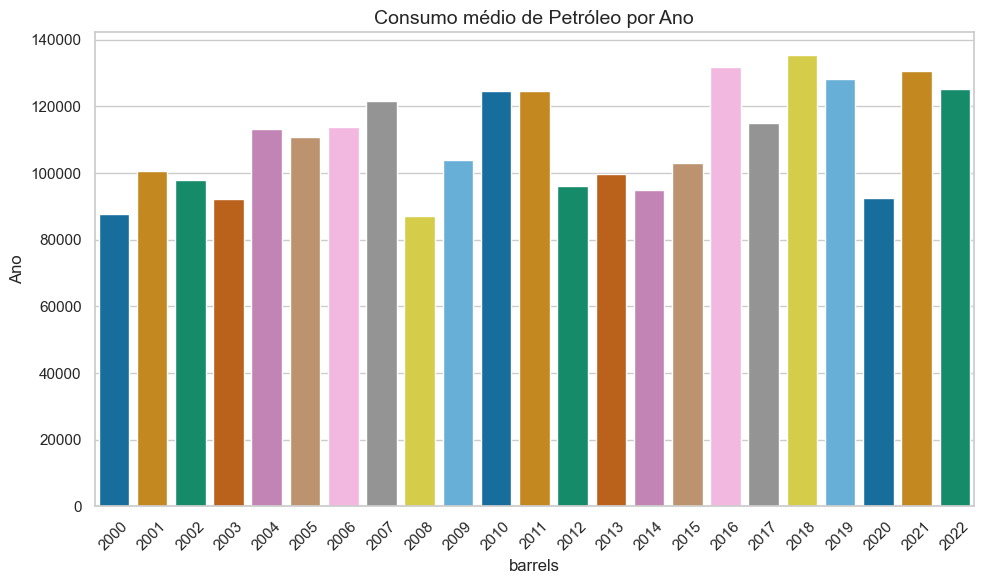

In [81]:
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='ano', y='barrels', data=consumo_medio_por_ano, palette="colorblind")

# Adiciona título e rótulos dos eixos
plt.title('Consumo médio de Petróleo por Ano', fontsize=14)
plt.xlabel('barrels', fontsize=12)
plt.ylabel('Ano', fontsize=12)

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45
           )  # Define rotação de 0 graus

plt.tight_layout()  # Ajusta o layout
plt.show()

In [82]:
producao_soma_por_ano.head()

,year,barrels per year,percent_growth
0,2000,72047.9,NaN
1,2001,72079.1,0.043305
2,2002,71891.4,-0.260408
3,2003,74586.9,3.749405
4,2004,79177.1,6.154164


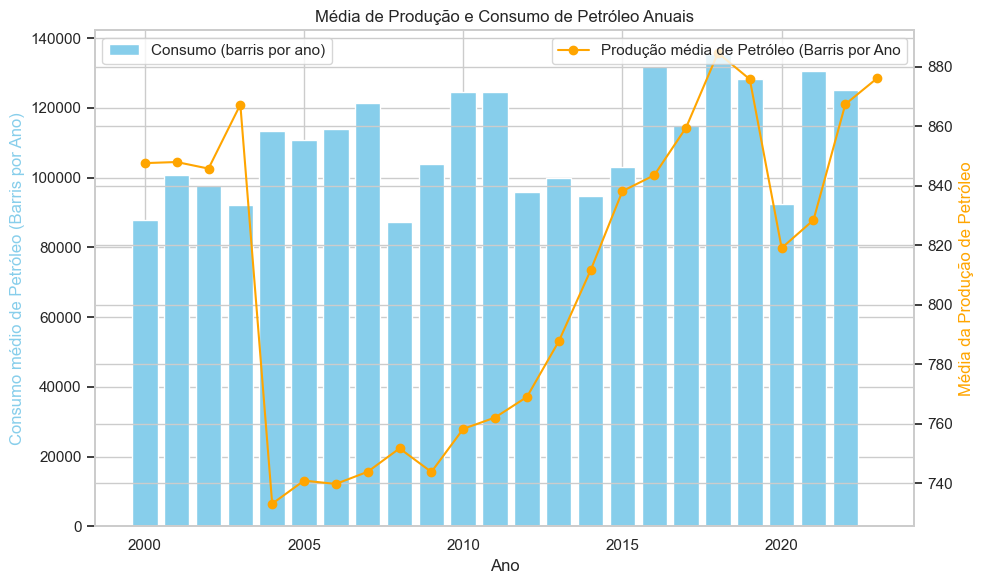

In [83]:
# Mesclando os dois DataFrames com base no ano
consumo_producao = pd.merge(consumo_medio_por_ano, producao_media_por_ano, left_on='ano', right_on='year', how='inner')

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a consumo de petróleo:
ax1.bar(consumo_medio_por_ano['ano'], consumo_medio_por_ano['barrels'], color='skyblue', label='Consumo (barris por ano)')
ax1.set_ylabel('Consumo médio de Petróleo (Barris por Ano)', color='skyblue')
ax1.set_xlabel('Ano')

# Gráfico de barras para a producao de petróleo:
ax2 = ax1.twinx()
ax2.plot(producao_media_por_ano['year'], producao_media_por_ano['barrels per year'], color='orange', marker='o', label='Produção média de Petróleo (Barris por Ano')
ax2.set_ylabel('Média da Produção de Petróleo', color='orange')

# Título e exibição da legenda
plt.title('Média de Produção e Consumo de Petróleo Anuais')
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

* O consumo médio de petróleo, representado pelas barras, parece relativamente estável ao longo dos anos, com algumas flutuações, mas sem uma tendência de crescimento ou declínio acentuado. Isso indica que a demanda por petróleo estável ao longo do tempo, apesar de eventuais variações.

* A linha laranja mostra que a produção de petróleo passou por várias oscilações, com uma queda acentuada em meados dos anos 2000 e um aumento significativo a partir de 2010.
Esse aumento recente na produção pode estar associado a novas tecnologias de extração, como o fracking, ou à exploração de novos campos petrolíferos.

* O gráfico destaca a relação complexa entre produção e consumo de petróleo, onde fatores externos e avanços tecnológicos parecem ter papel significativo. A análise dessas tendências ajuda a entender a segurança energética e a dependência de importações, além de fornecer insights sobre a resiliência da produção frente a demandas flutuantes.


### Análise do Consumo de energia por país:

In [84]:
# Média do Consumo de Energia (pais) por ano:
consumo_medio_por_pais = consumo.groupby('pais')['barrels'].mean().reset_index()
consumo_medio_por_pais.head()

,pais,barrels
0,Afghanistan,7.908546
1,Albania,9.490255
2,Algeria,117.091454
3,American Samoa,1.146927
4,Angola,34.325337


In [85]:
Consumo_medio_top_10_paises = consumo_medio_por_pais.nlargest(10, 'barrels')
Consumo_medio_top_10_paises.head(10)

,pais,barrels
197,United States,5.379191e+06
39,China,2.840404e+06
94,Japan,1.420485e+06
86,India,1.102370e+06
150,Russia,9.741289e+05
158,Saudi Arabia,9.195476e+05
71,Germany,8.347880e+05
24,Brazil,7.779381e+05
168,South Korea,7.599690e+05
34,Canada,6.695855e+05


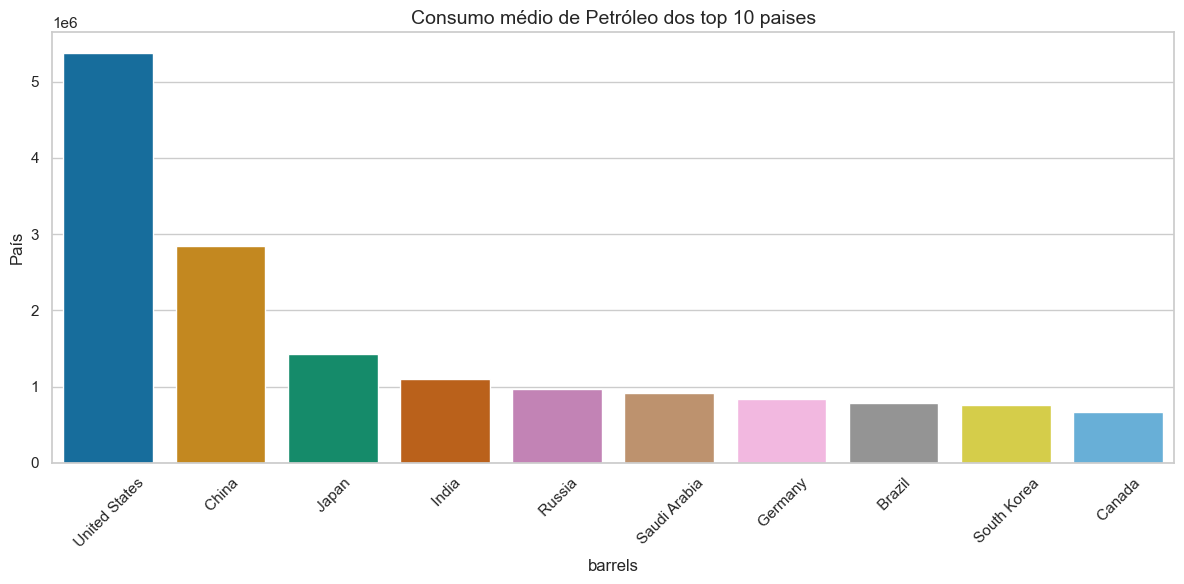

In [86]:
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura
ax = sns.barplot(x='pais', y='barrels', data=Consumo_medio_top_10_paises, palette="colorblind")

# Adiciona título e rótulos dos eixos
plt.title('Consumo médio de Petróleo dos top 10 paises', fontsize=14)
plt.xlabel('barrels', fontsize=12)
plt.ylabel('País', fontsize=12)

# Ajusta a rotação dos valores no eixo x
plt.xticks(rotation=45
           )  # Define rotação de 0 graus

plt.tight_layout()  # Ajusta o layout
plt.show()

## Passo 5: Criação do dashboard

Com os dados preparados e analisados, é hora de criar um dashboard interativo para apresentar suas desco-
bertas. Utilize uma ferramenta de visualização de dados, como Tableau, Power BI ou Python (por exemplo,
usando bibliotecas como Matplotlib, Seaborn ou Plotly), para criar gráficos e visualizações interativas. Certifi-
que-se de incluir informações relevantes sobre a variação do preço do barril de petróleo Brent, bem como in-
sights derivados da análise dos dados.

Lembre-se de documentar todo o processo, desde a coleta dos dados até a criação do dashboard. Isso aju-
dará a refletir sobre as etapas realizadas e a compartilhar seu conhecimento com outras pessoas interessa-
das na analise de dados.

## Passo 6: MVP no Streamlit

Faça um MVP do seu modelo em produção utilizando o Streamlit. 